# (How the Trip Duration Differs by Riders' Characteristics and Time)
## by (Mohamed Hossam El_Din)

## Investigation Overview

>  In this presentation, I will highlight the features by which a bike trip duration will be affected. These features are ( the day of the week"weekDay", time, user_type, gender, and age)

## Dataset Overview

>  This Dataset from February 2019 contains about (183.5 k) record about bike sharing system trips including the duration, start and end times and locations, riders' birth years and genders,and whether they are customers or subscribers. About 10k trips was excluded due to inconsistencies or missing information.

# (Fordgobike Data Exploration )
## by (Mohamed Hossam El_Din)

## Preliminary Wrangling

> 
This Dataset from February 2019 contains data about bike sharing system trips including the duration, start and end times and locations, riders' birth years and genders, whether they are customers or subscribers, and whether they are inrolled in bike_share_for_all program or not. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# Loading the data into (fordgobike) dataframe:
fordgobike = pd.read_csv('201902-fordgobike-tripdata.csv')
fordgobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


Most of these columns will not be useful for my invistigation so I will drop them in a few steps.

In [4]:
print(fordgobike.shape)

(183412, 16)


In [5]:
# General overview:
fordgobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
fordgobike.duration_sec.describe()

count    183412.000000
mean        726.078435
std        1794.389780
min          61.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       85444.000000
Name: duration_sec, dtype: float64

In [7]:
sum(fordgobike.duplicated())

0

No duplicates.

So far I will need to add columns for:
    
    -duration in minutes to make it more interpretable during invistigation: duration_min
    -the day of the month from start_time column since the data is for February 2019 : start_day
    -the hour of the day from start_time column : start_hour
    -the day of week : weekDay
    -the age form member_birth_year since it will be more useful and easier to interpret.

In [8]:
# For duration, I going to change it to be in minutes rather than seconds, so that it's more interpretable.

duration_min = fordgobike.duration_sec / 60
fordgobike.insert(1, 'duration_min', duration_min)
fordgobike['duration_min'] = fordgobike['duration_min'].round(decimals=0)
fordgobike.duration_min = fordgobike.duration_min.astype(int)

In [9]:
# now extracting start_day, and start_hour form start_time column:

fordgobike.start_time = pd.to_datetime(fordgobike.start_time)

start_day = fordgobike.start_time.dt.day
fordgobike.insert(3, 'start_day', start_day)

start_hour = fordgobike.start_time.dt.hour
fordgobike.insert(3, 'start_hour', start_hour)

In [10]:
# Here, I'm creating a column for Day names so that I can track the relation between them and the trip duration.

days={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
weekDay = fordgobike['start_time'].dt.dayofweek.map(days)
fordgobike.insert(5, 'weekDay', weekDay)

In [11]:
# changing the weekDay column into categorical ordinal:

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
week_days = pd.api.types.CategoricalDtype(ordered=True, categories=days)
fordgobike.weekDay = fordgobike.weekDay.astype(week_days)

In [12]:
# Since I want to make use of age, gender, and user type, I will drop any row having NaN value in these columns.

fordgobike.dropna(subset=['user_type', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip'], inplace=True)

In [13]:
# Creating a column "age" for riders' ages instead of their birth years:

fordgobike.member_birth_year = fordgobike.member_birth_year.astype(int)
fordgobike['age'] = 2019 - fordgobike.member_birth_year

In [14]:
# Dropping unwanted columns:

fordgobike.drop(labels=['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 
                       'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id',
                        'member_birth_year'], axis=1, inplace=True)

In [15]:
# This is how my dataframe looks like after wrangling:

fordgobike.reset_index(inplace=True, drop=True)
fordgobike.head()

,duration_min,start_hour,start_day,weekDay,user_type,member_gender,bike_share_for_all_trip,age
0,870,17,28,Thursday,Customer,Male,No,35
1,1031,12,28,Thursday,Customer,Male,No,47
2,608,17,28,Thursday,Subscriber,Other,No,30
3,26,23,28,Thursday,Subscriber,Male,Yes,45
4,30,23,28,Thursday,Subscriber,Male,No,60


In [16]:
print(fordgobike.shape)
print(fordgobike.dtypes)

(175147, 8)
duration_min                  int32
start_hour                    int64
start_day                     int64
weekDay                    category
user_type                    object
member_gender                object
bike_share_for_all_trip      object
age                           int32
dtype: object


### What is the structure of your dataset?

>  After wrangling, there are about 175 thousand trips in my dataframe with 8 features (duration_min, start_hour, start_day, weekDay, user_type, member_gender, bike_share_for_all_trip, age). duration_min, start_hour,and start_day are numeric variables, while the rest are categorical in nature with weekDay ordered categorical.

### What is/are the main feature(s) of interest in your dataset?

> I want to see what variables have the most effect on the duration of each trip. So (duration_min) is my main feature.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think that a trip duration will change from hour to hour within the day(start_hour), from day to day within a month(start_day), for each day in the week(weekDay). Also (user_type, gender, and age) my have a relation with the average trip duration.

## Univariate Exploration



##### I will be investigating :
    
    1-the distibution of the duration.
    2-the distibution of the start_hour.
    3-the distibution of the start_day, and weekDay.
    4-the distibution of the age.
    5-the relative fractions of user_type, member_gender, and bike_share_for_all_trip.

In [ ]:
# 1-the distibution of the duration:

bins = np.arange(0, fordgobike.duration_min.max()+5, 5)

plt.figure(figsize=[8, 5])
plt.hist(data=fordgobike, x='duration_min', bins=bins);
plt.xlim(0, 60)
plt.xlabel('Trip duration in minutes', fontsize=12)
plt.ylabel('count');

Here I see that the plot is highly skewed to the right with a long tail, so log transformation will be useful here. Almost 30k trip consumed less than 5 minutes, and the majority between 5 and 10 minutes. Also there is many outliers that affects the plot, so I had to zoom in to the range of 60 minutes, which is the most frequent, to see the distribution.

## (Distribution of Trip Durations)

> The distribution of trip durations has a long range of values. After plotting on a log scale, it appears unimodal with it's peak at 6 minutes.

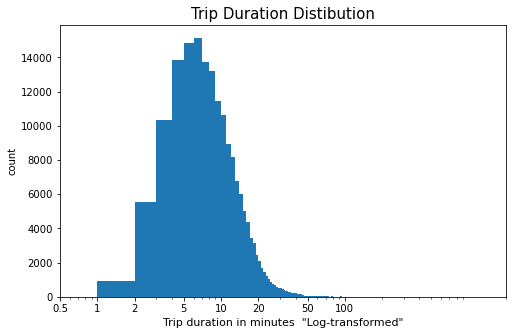

In [17]:
bins = np.arange(0, fordgobike.duration_min.max()+1, 1)
plt.figure(figsize=[8, 5])
plt.hist(data=fordgobike, x='duration_min', bins=bins)
plt.xscale('log')
plt.title('Trip Duration Distibution', fontsize=15)
plt.xlabel('Trip duration in minutes  "Log-transformed"', fontsize=11)
plt.ylabel('count')
ticks = [0.5, 1, 2, 5, 10, 20, 50, 100]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels);

As we can see the duration distribution is unimodal with the peak at around 6 minutes.

## (Day Hours Distibution)

> The distibution is bimodal with two peaks at about (8 am) and (5 pm) which are the times for going to and retuning from a university or work and also the rush hours for traffic where people may use bikes instead of vehicels.

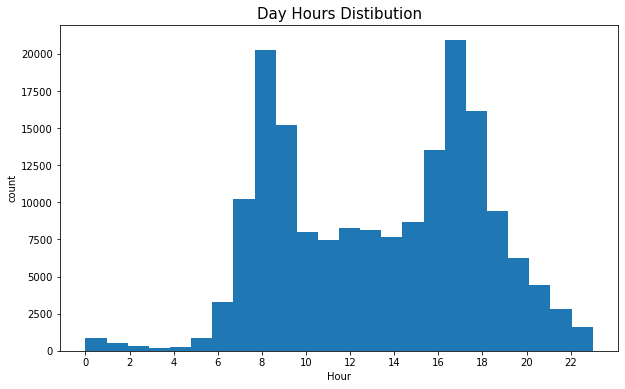

In [18]:
plt.figure(figsize=[10,6])
plt.hist(data=fordgobike, x='start_hour', bins=24)
plt.xticks(np.arange(0,24,2), np.arange(0,24,2))
plt.title('Day Hours Distibution', fontsize=15)
plt.xlabel('Hour')
plt.ylabel('count');

The distibution is bimodal with two peaks at about (8 am) and (5 pm) which are the times for going to and retuning from a university or work and also the rush hours for traffic where people may use bikes instead of vehicels.

In [21]:
# Some Colors:

default_color = sb.color_palette()[0]
default_color_1 = sb.color_palette()[1]
default_color_2 = sb.color_palette()[2]
default_color_3 = sb.color_palette()[3]

In [ ]:
# 3-the distibution of the start_day:

plt.figure(figsize=[12,6])

sb.countplot(data=fordgobike, x='start_day', color=default_color);

As one would expect, there is almost a steady number of trips for all days of the month separated by two days between each five days when people mostly are in weekend (2,3 low trips) then (4:8 high) then (9,10 low) and so on, though the pattern is not normal for the 13th of the month. It may be a holiday or has something to do with Valentine's Day.

In [ ]:
# what is that day?
fordgobike[fordgobike.start_day == 13].weekDay.value_counts()

"Wednesday", it is not a weekend so it should have a normal number of trips like the day before it for example. It may need farther invistigation.

In [ ]:
# now plotting a bar chart for week days to see the distribution:

plt.figure(figsize=[8, 5])
sb.countplot(data=fordgobike, x='weekDay', color=default_color_2)
plt.xticks(rotation=20);

As we expected, weekends have lower number of trips.

In [ ]:
# 4-the distibution of the age:

plt.figure(figsize=[8, 5])
bins = np.arange(0, fordgobike.age.max()+2, 2)
plt.hist(data=fordgobike, x='age', bins=bins)
plt.xlabel('Age')
plt.ylabel('count');

The majority are between 20 and 60, which is the expected category to ride a bike including university students and workers, however, there is also a significant fraction of relatively old people who ride bikes. There are some outliers in the age so I think I will exclude the trips with ages greater than 80.

In [ ]:
# looking at the number of outliers
fordgobike[fordgobike.age > 80].shape

In [19]:
# excluding outliers from the data:
fordgobike.drop(fordgobike[fordgobike.age > 80].index, axis=0, inplace=True)
fordgobike.reset_index(inplace=True, drop=True)

In [ ]:
# 5-the relative fractions of user_type, member_gender, and bike_share_for_all_trip:

plt.figure(figsize=[17,8])

plt.subplot(1,3,1)
sorted_counts = fordgobike.user_type.value_counts()
plt.pie(x=sorted_counts, labels=sorted_counts.index, startangle=90, counterclock=False,
        autopct=lambda p: '{:.1f}%'.format(p))
plt.axis('square')
plt.xlabel('user type', labelpad=30);

plt.subplot(1,3,2)
sorted_counts = fordgobike.member_gender.value_counts()
plt.pie(x=sorted_counts, labels=sorted_counts.index, startangle=90, counterclock=False,
        autopct=lambda p: '{:.1f}%'.format(p))
plt.axis('square');
plt.xlabel('Gender', labelpad=30);

plt.subplot(1,3,3)
sorted_counts = fordgobike.bike_share_for_all_trip.value_counts()
plt.pie(x=sorted_counts, labels=sorted_counts.index, startangle=90, counterclock=False,
        autopct=lambda p: '{:.1f}%'.format(p))
plt.axis('square');
plt.xlabel('Bike_share_for_all program', labelpad=30);

Most of the trips are for male subscribers who are not part of Bike_share_for_all program.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration variable distribution was highly right-skewed with a long tail of data, so I used a log scale for the distribution and it appeared unimodal with the peak at around 6 minutes.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> For the start_day distribution, there was an abnormal value associated with 13th of the month. Regarding rider ages, there were outliers, so I excluded all the data with age values greater than 80 years since we expect bike riders to be relatively young. Also, there were only 192 outliers, which is not a significant fraction. 

## Bivariate Exploration



I will consider the relation between each of the brevious features(start_hour, weekDay, member_gender, user_type and age) and the average of trip duration.

In [ ]:
# Frist How the duration is affected by the time of the day:

plt.figure(figsize=[20,8])

plt.subplot(1,2,1)
sb.barplot(data=fordgobike, x='start_hour', y='duration_min', color=default_color, ci=0)
plt.grid(axis='y');

plt.subplot(1,2,2)
sb.boxplot(data=fordgobike, x='start_hour', y='duration_min', color=default_color);
plt.yscale('log')
plt.ylabel('duration  "Log-transformed"', labelpad=10)
plt.ylim(0.5,100);

Most of the trips take, on average, from 4 to 11 minutes. Looking at the right plot, we can see that the average duration rises a little bit at the noon of the day. However, the interesting thing is the peak at 2 and 3 am. One can expain that by darkness of the streets at this time since many shops will be closed already.

## (Trip Duration along Week Days)

> The mean duration is nearly steady, of about 11 minutes, through week days. However, the average duration for weekends is a little bit longer. This was due to the relatively low number of trips on weekedns and the broader duration distribution associated with Saturday and Sunday as appears from the box plot.

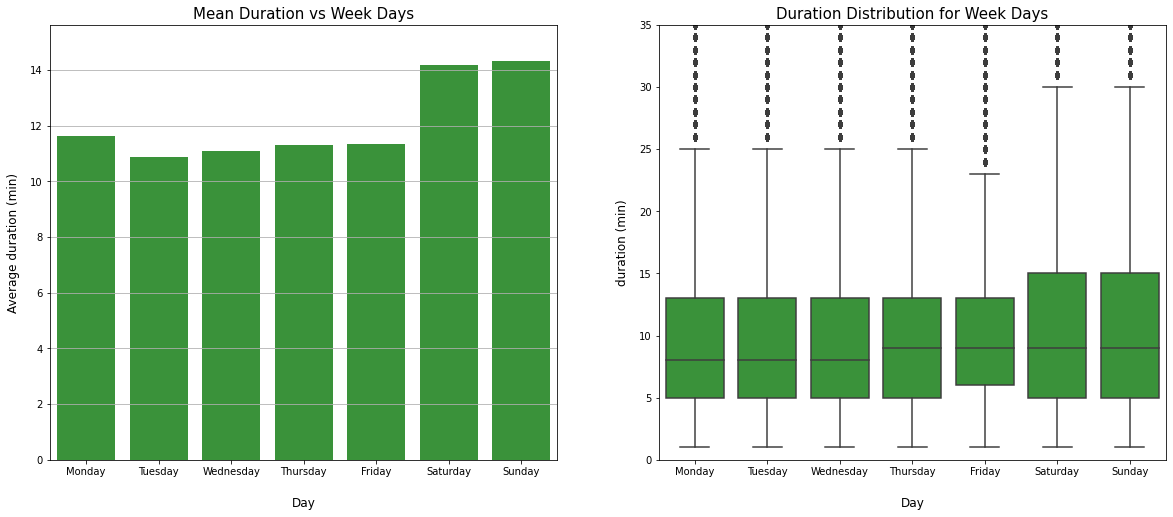

In [23]:
plt.figure(figsize=[20,8])
plt.subplot(1,2,1)
sb.barplot(data=fordgobike, x='weekDay', y='duration_min', color=default_color_2, errwidth=0)
plt.grid(axis='y')
plt.title('Mean Duration vs Week Days', fontsize=15)
plt.xlabel('Day', fontsize=12, labelpad=20)
plt.ylabel('Average duration (min)', fontsize=12, labelpad=10);
plt.subplot(1,2,2)
sb.boxplot(data=fordgobike, x='weekDay', y='duration_min', color=default_color_2)
plt.ylim(0, 35)
plt.title('Duration Distribution for Week Days', fontsize=15)
plt.xlabel('Day', fontsize=12, labelpad=20)
plt.ylabel('duration (min)', fontsize=12, labelpad=10);

The mean duration is nearly steady, of about 11 minutes, through week days. However, the average duration for weekends is a little bit longer. I will do further invistigation on that by faceting.

In [ ]:
# faceting:
bins = np.arange(0, fordgobike.duration_min.max()+5, 5)
g = sb.FacetGrid(data=fordgobike, col='weekDay', col_wrap=4, xlim=(0,300), ylim=(0,100))
g.map(plt.hist, 'duration_min', bins=bins);

As we can see, they all have almost fair distribution for high durations. Taking into account the fact that there are smaller number of trips on weekends (saturday, sunday), the distribution for high durations should affect the average. That's why the average duration for weekends is a little bit longer than that for weekdays.

## (Trip Duration and Age Correlation)

> Despite that most of data is at to lower ages, there is a very weak positive correlation between the age and duration.

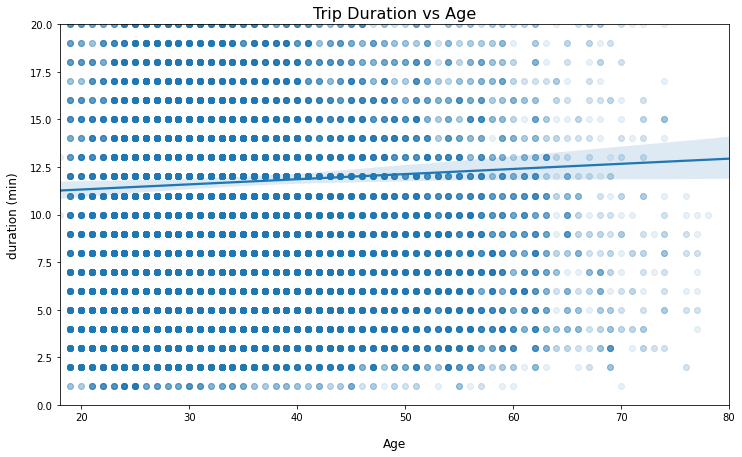

In [24]:
np.random.seed(2019)
samples = np.random.choice(fordgobike.shape[0], 50000, replace = False)
ford_samp = fordgobike.loc[samples,:]
plt.figure(figsize=[12,7])
sb.regplot(data=ford_samp, x='age', y='duration_min', scatter_kws={'alpha':.1})
plt.ylim(0,20)
plt.title('Trip Duration vs Age', fontsize=16)
plt.xlabel('Age', fontsize=12, labelpad=15)
plt.ylabel('duration (min)', fontsize=12, labelpad=10);

Despite that most of data is at to lower ages, there is obviously a very weak positive correlation between the age and duration.

In [25]:
# Finding the correlation between age and duration:
fordgobike[['duration_min', 'age']].corr().round(decimals=2)

,duration_min,age
duration_min,1.00,0.01
age,0.01,1.00


In [ ]:
# Now, let's see the duration associated with the most frequent age using a heat map:

plt.figure(figsize=[12,7])

x_bins = np.arange(fordgobike.age.min(), fordgobike.age.max()+2, 2)
y_bins = np.arange(0, 100, 2)
plt.hist2d(data=fordgobike, x='age', y='duration_min', cmin=0.5, cmap='viridis_r', bins=[x_bins, y_bins])
plt.colorbar(label='count')
plt.ylim(0,60);
plt.xlabel('Age')
plt.ylabel('duration (min)', labelpad=10);

The duration associated with the most frequent age, ranging from 20 to 45 years old, is 20 minutes or less. This is normal because 
 most people, in general, do not ride bikes for an hour or more since it will be exhausting, specially if it is frequent or daily.

In [ ]:
# age distribution for different genders:

plt.figure(figsize=[10,6])
plt.hist(fordgobike[fordgobike.member_gender == 'Male'].age, bins=30, color='blue');
plt.hist(fordgobike[fordgobike.member_gender == 'Female'].age, bins=30, color='deepskyblue');
plt.hist(fordgobike[fordgobike.member_gender == 'Other'].age, bins=30, color='DimGray')
plt.legend(['Male','Female','Other']);
plt.xlabel('Age')
plt.ylabel('count');

In [ ]:
# age distribution for different users:
plt.figure(figsize=[10,6])
plt.hist(ford_samp[ford_samp.user_type == 'Subscriber'].age, bins=30, color='green');
plt.hist(ford_samp[ford_samp.user_type == 'Customer'].age, bins=30);
plt.legend(['Subscriber','Customer']);
plt.xlabel('Age')
plt.ylabel('count');

There is a peak age for subscribers few years above 30, while the peak for customers is about 30.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>  Most of the trips take, on average, from 4 to 11 minutes. The mean duration is nearly steady, of about 11 minutes, through week days. However, the average duration for weekends is a little bit longer. There is a positive weak correlation between age and tip duration, with the duration associated with the most frequent age is 20 minutes or less.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No, in fact all the relations seemed consistent.

## Multivariate Exploration



##### Questions I will be answering:

    1- Does the average trip duration associated with different days and hours differ by user type?
    2- is the duration, associated with the most frequent age, the same for both genders?
    3- Does average duration for each gender differ by user_type?

## (User Type Impact on the Mean Duration along the Week)

> Customers' trips take more time in general. The interesting thing here is the steady average trip time around the week for the Sbscribers versus the vriability in the duration for the Customers. This is actually predictable since subscribers are expected to maintain a fixed use, while customers are free of that commitment.

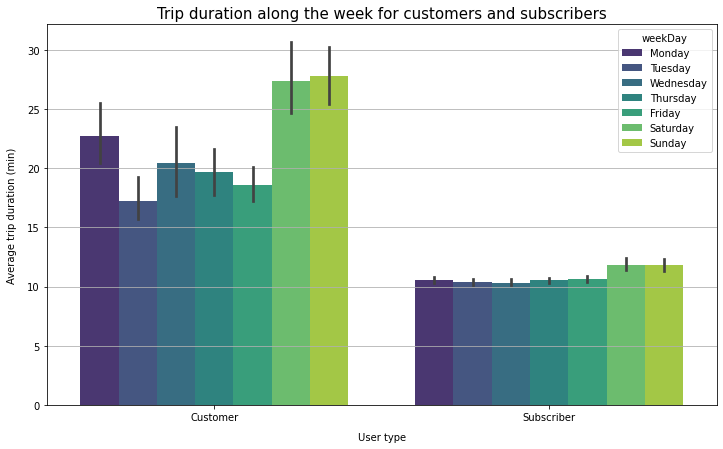

In [26]:
plt.figure(figsize=[12,7])
sb.barplot(data=fordgobike, x='user_type', y='duration_min', hue='weekDay', palette='viridis')
plt.grid(axis='y')
plt.title('Trip duration along the week for customers and subscribers', fontsize= 15)
plt.ylabel('Average trip duration (min)', labelpad=10)
plt.xlabel('User type', labelpad=10);

So, obviously Customers' trips take more time in general. The interesting thing here is the steady average trip time around the week for the Sbscribers versus the vriability in the duration for the Customers. This is actually predictable since subscribers are expected to maintain a fixed use, while customers are free of that commitment.

In [ ]:
# Now I will create the above plot for different genders:

g = sb.FacetGrid(data=ford_samp, col='member_gender', col_wrap=2, height=4, aspect=1.5)
g.map(sb.barplot, 'user_type', 'duration_min', 'weekDay', order=user_order, palette='viridis', ci=0)
g.add_legend();

Here is an interesting thing in the second plot. As compared to the first plot, we can see that females' trips takes longer durations on average. Also, the subscribers from both genders maintain an average duration, though there is variability for Other gender durations.

In [ ]:
# The same plot as the above.
user_order = ['Subscriber', 'Customer']
gender_order = ['Male', 'Female', 'Other']
g = sb.FacetGrid(data=ford_samp, col='user_type', col_order=user_order, row='member_gender', row_order=gender_order, height=4, aspect=1.5, margin_titles=True)
g.map(sb.barplot, 'weekDay', 'duration_min', palette='viridis', ci=0);

## (Variation of trip duration along the day for customers and subscribers)

> It is surprising that the mean duration is almost steady for the subscribers. One would expect a kind of variation along the day, however, it may be meaningful that it is the case for subscribers, who have trips according to a schedule. For the Customer type, there is variation with 3 peaks, one at (2,3) am, another at noon and afternoon, and one at midnight.

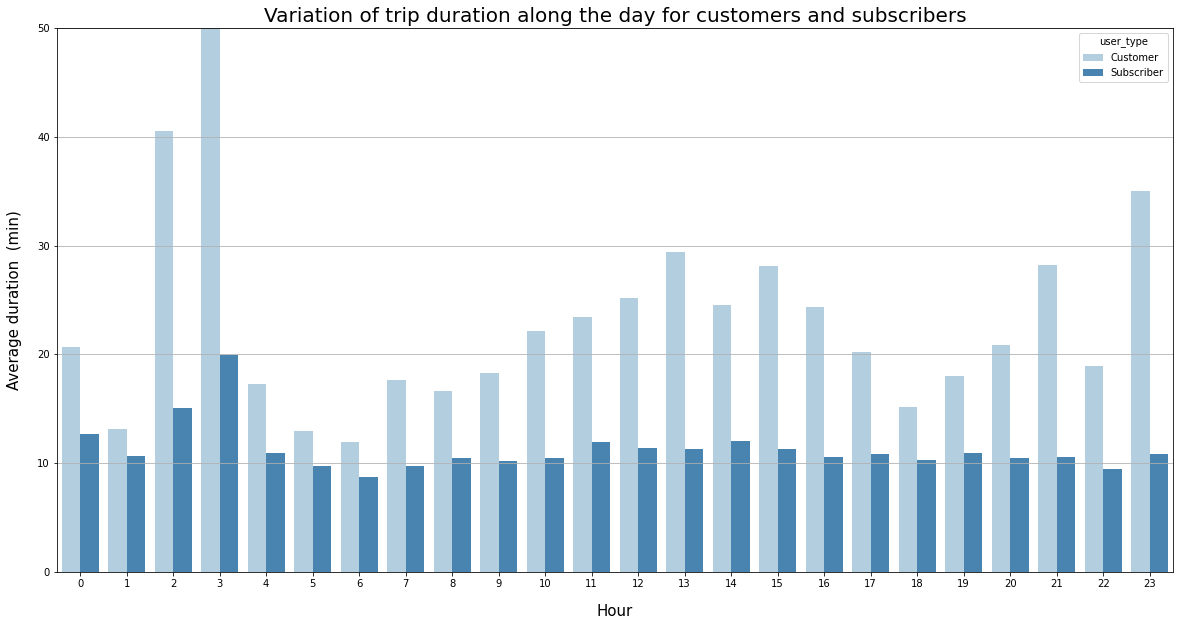

In [27]:
plt.figure(figsize=[20,10])
sb.barplot(data=fordgobike, x='start_hour', y='duration_min', hue='user_type', palette='Blues', ci=0)
plt.grid(axis='y')
plt.ylim(0,50)
plt.title('Variation of trip duration along the day for customers and subscribers', fontsize= 20)
plt.xlabel('Hour', fontsize= 15, labelpad=15)
plt.ylabel('Average duration  (min)', fontsize= 15, labelpad=15);

It is surprising that the mean duration is almost steady for the subscribers. One would expect a kind of variation along the day, however, it may be meaningful that it is the case for subscribers, who have trips according to a schedule. For the Customer type, there is variation with 3 peaks, one at (2,3) am, another at noon and afternoon, and one at midnight. This actually need farther invistigation. 

In [ ]:
# 2- is the duration, associated with the most frequent age, the same for both genders?


plt.figure(figsize=[20,14])
x_bins = np.arange(fordgobike.age.min(), fordgobike.age.max()+2, 2)
y_bins = np.arange(0, 100, 2)

plt.subplot(2,2,1)
plt.hist2d(data=fordgobike[fordgobike.member_gender == 'Male'], x='age', y='duration_min', cmin=0.5, cmap='viridis_r', bins=[x_bins, y_bins])
plt.colorbar(label='count')
plt.ylim(0,60)
plt.title('Trip duration vs Age for Males', fontsize= 13)
plt.xlabel('Age')
plt.ylabel('duration (min)');

plt.subplot(2,2,2)
plt.hist2d(data=fordgobike[fordgobike.member_gender == 'Female'], x='age', y='duration_min', cmin=0.5, cmap='viridis_r', bins=[x_bins, y_bins])
plt.colorbar(label='count')
plt.ylim(0,60)
plt.title('Trip duration vs Age for Females', fontsize= 13)
plt.xlabel('Age')
plt.ylabel('duration (min)');

plt.subplot(2,2,3)
plt.hist2d(data=fordgobike[fordgobike.member_gender == 'Other'], x='age', y='duration_min', cmin=0.5, cmap='viridis_r', bins=[x_bins, y_bins])
plt.colorbar(label='count')
plt.ylim(0,60)
plt.title('Trip duration vs Age for Other gender', fontsize= 13)
plt.xlabel('Age')
plt.ylabel('duration (min)');

Almost no difference. The time range associated with the most frequent age for each category is the same. However, we notice that  male age is more braoden for that range than female age. Other gender age looks bimodal between 30 and 40.

## (Trip duration vs user type for each gender)

> Females generally take longer durations. I don't think that this is related to the physical attributes, but it may be a reflection of gender attitudes, something like the way each gender act or dress. The the distination of each gender probablly has something to do with this.

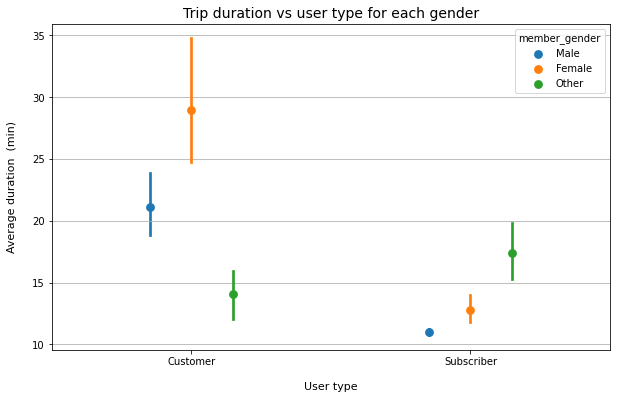

In [29]:
user_order = ['Subscriber', 'Customer']
gender_order = ['Male', 'Female', 'Other']
plt.figure(figsize=[10,6])
sb.pointplot(data=fordgobike.query('age > 25 and age > 45'), x='user_type', y='duration_min', hue='member_gender', 
             linestyles="", dodge=.3, hue_order=gender_order)
plt.grid(axis='y')
plt.title('Trip duration vs user type for each gender', fontsize= 14)
plt.xlabel('User type', fontsize= 11, labelpad=15)
plt.ylabel('Average duration  (min)', fontsize= 11, labelpad=15);

Females generally take longer durations. I don't think that this is related to the physical attributes, but it may be a reflection of gender attitudes, something like the way each gender act or dress. Though, I didn't investigate the the distination for each gender. It probablly has something to do with this.

In [ ]:
# the effect of bike_share_for_all program on the duration for each user type and gender:

plt.figure(figsize=[18, 6])

plt.subplot(1,2,1)
sb.pointplot(data=fordgobike[fordgobike.bike_share_for_all_trip == 'No'], x='user_type', y='duration_min', 
             hue='member_gender', linestyles="", ci=0, dodge=.3, order=user_order, hue_order=gender_order)
plt.grid(axis='y')
plt.ylim(8,30)
plt.title('NOT Enrolled')
plt.xlabel('User type', fontsize= 11, labelpad=15)
plt.ylabel('Average duration  (min)', fontsize= 11, labelpad=15);

plt.subplot(1,2,2)
sb.pointplot(data=fordgobike[fordgobike.bike_share_for_all_trip == 'Yes'], x='user_type', y='duration_min', 
             hue='member_gender', linestyles="", ci=0, dodge=.3, order=user_order, hue_order=gender_order)
plt.grid(axis='y');
plt.ylim(8,30)
plt.title('Enrolled')
plt.xlabel('User type', fontsize= 11, labelpad=15)
plt.ylabel('Average duration  (min)', fontsize= 11, labelpad=15);

The plot to the right reflects the fact that Customers are not part of bike_share_for_all_trip program, since they are not subscribers in the first place.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>  It was so clear that all relationships reveal that Customers' trips take more time in general. The mean trip duration for subscribers was steady for all weekdays, around 11 minutes, and I considered that it's due to the usage according to a schedule. It was steady too along the day, which was surprising, since I expected some variation between day and night, though that was the case for customers, unlike subscribers. The time range associated with the most frequent age doesn't differ by gender. I also found that Females generally take longer durations. That might needed farther investigation in terms of start and end locations.

### Were there any interesting or surprising interactions between features?

> The fact that the average trip duration associated with subscribers is almost constant along the day was surprising, since one would expect a longer mean duration during night, when darkness exists and the vision is not clear as in the daytime.